# IMPORTING DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
lagos = pd.read_csv(r'C:\Users\Victordanok\Desktop\Projects\Temperature Data for Lagos\Datasets\lagosdata.csv')
globe = pd.read_csv(r'C:\Users\Victordanok\Desktop\Projects\Temperature Data for Lagos\Datasets\globaldata.csv')

# EDA ON DATASETS

In [3]:
lagos.info()
lagos.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      165 non-null    int64  
 1   city      165 non-null    object 
 2   country   165 non-null    object 
 3   avg_temp  151 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.3+ KB


year         0
city         0
country      0
avg_temp    14
dtype: int64

In [4]:
globe.info()
globe.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


year        0
avg_temp    0
dtype: int64

In [5]:
lagos.describe()

,year,avg_temp
count,165.000000,151.000000
mean,1931.000000,26.553113
std,47.775517,0.542227
min,1849.000000,24.860000
25%,1890.000000,26.195000
50%,1931.000000,26.660000
75%,1972.000000,26.920000
max,2013.000000,27.790000


In [6]:
globe.describe()

,year,avg_temp
count,266.000000,266.000000
mean,1882.500000,8.369474
std,76.931788,0.584747
min,1750.000000,5.780000
25%,1816.250000,8.082500
50%,1882.500000,8.375000
75%,1948.750000,8.707500
max,2015.000000,9.830000


In [7]:
lagos.tail()

,year,city,country,avg_temp
160,2009,Lagos,Nigeria,27.53
161,2010,Lagos,Nigeria,27.79
162,2011,Lagos,Nigeria,27.35
163,2012,Lagos,Nigeria,27.15
164,2013,Lagos,Nigeria,27.36


# CLEANING THE DATA

Some observations made are:

Lagos dataset;
- has 165 entries
- has 14 null data in the avg_temp column

globe dataset;
- has 266 entries

Solutions to the above
- fill the null data with the mode value for that column
- match the number of entries on both datasets so the data can be uniform
- years should begin from 1849 and end at 2013

In [8]:
lagos['avg_temp'].mode()


0    26.66
dtype: float64

In [9]:
#filling the null data in the lagos dataset

lagos['avg_temp'].fillna(value = int(lagos['avg_temp'].mode()), inplace = True)

In [10]:
#confirmation of filled null values

lagos.isna().sum()

year        0
city        0
country     0
avg_temp    0
dtype: int64

In [11]:
lagos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      165 non-null    int64  
 1   city      165 non-null    object 
 2   country   165 non-null    object 
 3   avg_temp  165 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.3+ KB


In [12]:
#Dropping unwanted rows in the globe dataset so we can have an even number of rows for both datasets
#and equal number of years

globe.drop(globe.index[[264,265]], inplace = True)
globe.drop(globe.index[:99], inplace = True)

In [13]:
globe.iloc[20:100]

,year,avg_temp
119,1869,8.43
120,1870,8.20
121,1871,8.12
122,1872,8.19
123,1873,8.35
...,...,...
194,1944,8.85
195,1945,8.58
196,1946,8.68
197,1947,8.80


In [14]:
globe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 99 to 263
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      165 non-null    int64  
 1   avg_temp  165 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.9 KB


In [15]:
lagos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      165 non-null    int64  
 1   city      165 non-null    object 
 2   country   165 non-null    object 
 3   avg_temp  165 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.3+ KB


In [16]:
lagos

,year,city,country,avg_temp
0,1849,Lagos,Nigeria,25.98
1,1850,Lagos,Nigeria,25.87
2,1851,Lagos,Nigeria,26.10
3,1852,Lagos,Nigeria,26.00
4,1853,Lagos,Nigeria,26.00
...,...,...,...,...
160,2009,Lagos,Nigeria,27.53
161,2010,Lagos,Nigeria,27.79
162,2011,Lagos,Nigeria,27.35
163,2012,Lagos,Nigeria,27.15


# Calculating the Exponential Moving Averages

In [17]:
lagos['mov_avg'] = lagos.iloc[:,3].ewm(span=40, adjust= False).mean()

#iloc[:,3] - here indicates the column that the moving average should be performed on

In [18]:
globe['mov_avg'] = globe.iloc[:,1].ewm(span = 40, adjust = False).mean()

#iloc[:,3] - here indicates the column that the moving average should be performed on

In [19]:
globe.tail()

,year,avg_temp,mov_avg
259,2009,9.51,9.142542
260,2010,9.70,9.169735
261,2011,9.52,9.186821
262,2012,9.51,9.202586
263,2013,9.61,9.222460


In [20]:
globe.describe()

,year,avg_temp,mov_avg
count,165.000000,165.000000,165.000000
mean,1931.000000,8.554545,8.407709
std,47.775517,0.460165,0.326715
min,1849.000000,7.560000,7.976098
25%,1890.000000,8.190000,8.117637
50%,1931.000000,8.530000,8.359199
75%,1972.000000,8.770000,8.607611
max,2013.000000,9.730000,9.222460


In [21]:
lagos.tail()

,year,city,country,avg_temp,mov_avg
160,2009,Lagos,Nigeria,27.53,27.041692
161,2010,Lagos,Nigeria,27.79,27.078195
162,2011,Lagos,Nigeria,27.35,27.091453
163,2012,Lagos,Nigeria,27.15,27.094309
164,2013,Lagos,Nigeria,27.36,27.107270


In [22]:
lagos.describe()

,year,avg_temp,mov_avg
count,165.000000,165.000000,165.000000
mean,1931.000000,26.506182,26.372959
std,47.775517,0.541121,0.379020
min,1849.000000,24.860000,25.827045
25%,1890.000000,26.010000,25.983891
50%,1931.000000,26.600000,26.443705
75%,1972.000000,26.900000,26.678617
max,2013.000000,27.790000,27.107270


# Creating a new data set with the Moving Averages

In [23]:
#creating a new dataset by merging the lagos and globe datasets, the common column being row

weather = lagos.merge(globe, how = 'inner', on = 'year')

In [24]:
#dropping the unwanted columns as we now have our moving average columns

weather.drop(labels = ['avg_temp_x','avg_temp_y'], axis =1, inplace = True)

In [25]:
#renaming the remaining columns for clarity
weather.rename(columns = {'mov_avg_x':'lagos_avg', 'mov_avg_y':'globe_avg'}, 
               inplace = True)

In [26]:
#information on our new column
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 164
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       165 non-null    int64  
 1   city       165 non-null    object 
 2   country    165 non-null    object 
 3   lagos_avg  165 non-null    float64
 4   globe_avg  165 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.7+ KB


In [27]:
weather.head()

,year,city,country,lagos_avg,globe_avg
0,1849,Lagos,Nigeria,25.980000,7.980000
1,1850,Lagos,Nigeria,25.974634,7.976098
2,1851,Lagos,Nigeria,25.980750,7.986044
3,1852,Lagos,Nigeria,25.981689,7.991603
4,1853,Lagos,Nigeria,25.982582,7.993964


In [28]:
weather.describe()

,year,lagos_avg,globe_avg
count,165.000000,165.000000,165.000000
mean,1931.000000,26.372959,8.407709
std,47.775517,0.379020,0.326715
min,1849.000000,25.827045,7.976098
25%,1890.000000,25.983891,8.117637
50%,1931.000000,26.443705,8.359199
75%,1972.000000,26.678617,8.607611
max,2013.000000,27.107270,9.222460


#  VISUALIZATIONS

In [29]:
weather.head()

,year,city,country,lagos_avg,globe_avg
0,1849,Lagos,Nigeria,25.980000,7.980000
1,1850,Lagos,Nigeria,25.974634,7.976098
2,1851,Lagos,Nigeria,25.980750,7.986044
3,1852,Lagos,Nigeria,25.981689,7.991603
4,1853,Lagos,Nigeria,25.982582,7.993964


<AxesSubplot:>

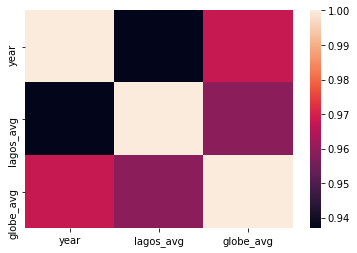

In [30]:
sns.heatmap(weather.corr())
#correlation information on our dataset shows that there is a very high correlation among all columns

<AxesSubplot:xlabel='year', ylabel='globe_avg'>

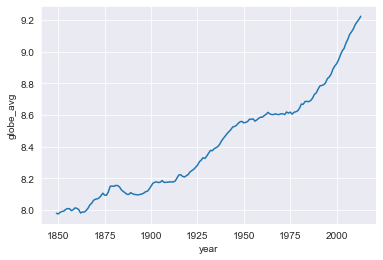

In [31]:
#line chart showing the averages for the global world temperature over the past 150 years
sns.set_style('darkgrid')
sns.lineplot(data = weather, 
            x = 'year', 
            y = 'globe_avg')


<AxesSubplot:xlabel='year', ylabel='lagos_avg'>

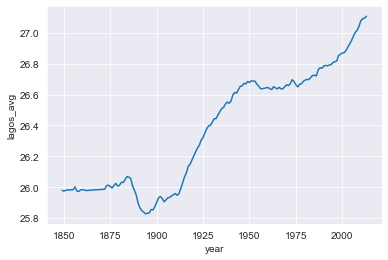

In [32]:
#line chart showing the averages of the temperature in lagos over the past 150 years
sns.set_style('darkgrid')
sns.lineplot(data = weather, 
            x = 'year', 
            y = 'lagos_avg')

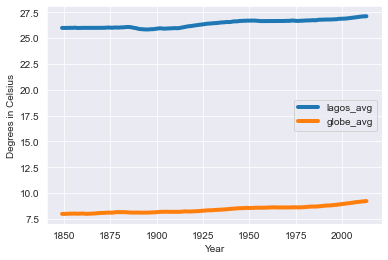

In [33]:
#Line chart comparing Lagos temperatures against that of the world temperatures over 150 years

plt.plot('year', 'lagos_avg', data = weather, marker = '', linewidth = 4)
plt.plot('year', 'globe_avg', data = weather, marker = '', linewidth = 4)
plt.xlabel('Year')
plt.ylabel('Degrees in Celsius')
sns.set_style('darkgrid')
plt.legend()
plt.show()

The following observations were made from the line chart above:

- Lagos temperature is alot higher than the world temperature. About 3 times higher than the world mean temperature.
- The differences between Lagos and the world temperature have not changed over 150 years.
- The relationship between Lagos and world temperature is linear. Both increase together and they also reduce together.
- The overall trend shows that the world temperature is getting higher and this has been increasing over the years albeit slowly.

In [34]:
weather.head()

,year,city,country,lagos_avg,globe_avg
0,1849,Lagos,Nigeria,25.980000,7.980000
1,1850,Lagos,Nigeria,25.974634,7.976098
2,1851,Lagos,Nigeria,25.980750,7.986044
3,1852,Lagos,Nigeria,25.981689,7.991603
4,1853,Lagos,Nigeria,25.982582,7.993964


In [35]:
weather.to_csv('tempdata.csv', index = False)